# Formula 1 Driver Career Analysis
Let't analyse the career of one of the most succesful F1 drivers of all time.

Pick a driver from the list in [this article](https://www.redbull.com/ca-en/best-f1-drivers-of-all-time) and analyse their career below.

Or you can pick your favourite driver instead =)

In [64]:
# make sure all requirements are up to date
%pip install -r ../../../requirements.txt >> ../../results/requirements_log.txt

Note: you may need to restart the kernel to use updated packages.


In [65]:
# imports
import pandas as pd
import numpy as np

In [85]:
# load the dataset from file
f1_results = pd.read_csv('../../resources/f1_results.csv', index_col=0)
f1_results.rename(columns=lambda x: x.lower(), inplace=True)

f1_results.head()

,season,round,date,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium
0,1950,1,1950-05-13,silverstone,farina,1906-10-30,Italian,alfa,1,8003600.0,Finished,9.0,1
1,1950,1,1950-05-13,silverstone,fagioli,1898-06-09,Italian,alfa,2,8006200.0,Finished,6.0,2
2,1950,1,1950-05-13,silverstone,reg_parnell,1911-07-02,British,alfa,4,8055600.0,Finished,4.0,3
3,1950,1,1950-05-13,silverstone,cabantous,1904-10-08,French,lago,6,NaN,+2 Laps,3.0,4
4,1950,1,1950-05-13,silverstone,rosier,1905-11-05,French,lago,9,NaN,+2 Laps,2.0,5


In [67]:
# pick a random driver
random_driver = np.random.choice(f1_results['driver'].unique())
print(f"We will analyse {random_driver}'s career.")


We will analyse lauda's career.


In [68]:
# which driver have you chosen?
driver = random_driver # 'max_verstappen'

# what nationality is this driver?

"""
    ------------
    First version
    ------------
"""

nationality = ""
for item in f1_results.values:
    #print(item)
    if item[4] == driver:
        nationality = item[6]
# print(f"{driver}'s nationality is {nationality} -- Version 1")

"""
    ------------
    Pythonic version
    ------------
"""
nationality = f1_results[f1_results['driver'] == driver]['nationality'].unique()[0]
# print(*nationality)
print(f"{driver}'s nationality is {nationality}")


lauda's nationality is Austrian


In [69]:
# when was his first race and for which constructor?
"""
    ------------
    First version
    ------------
"""
for item in f1_results.values:
    if item[4] == driver: 
        print(item[7])
        print(item[2])
        break
        
"""
    ------------
    Pythonic version
    ------------
"""
races = f1_results[f1_results['driver'] == driver]
first_race_date = races['date'].min()
first_race_constructor = races[races['date'] == races['date'].min()].iloc[0]['constructor']
print(f"{driver}'s first race was on {first_race_date} with {first_race_constructor}")

march-ford
1971-08-15
lauda's first race was on 1971-08-15 with march-ford


In [70]:
# when was his first podium + with which constructor?
"""
    ------------
    First version
    ------------
"""
try:
    list_to_append = []
    for item in f1_results.values:
        if item[4] == driver and item[12] in (1, 2, 3):
            print(item[7])
            print(item[2])
            list_to_append.append(item[7])
            break
    list_to_append[0] 
except Exception as e:
    print(e)
    print(f"{driver} has never been on the podium")

"""
    ------------
    Pythonic version
    ------------
"""
try:
    podiums = f1_results[(f1_results['driver'] == driver) & (f1_results['podium'].isin([1, 2, 3]))]
    first_podium_date = podiums['date'].min()
    first_podium_constructor = podiums[podiums['date'] == podiums['date'].min()].iloc[0]['constructor']
    print(f"{driver}'s first podium was on {first_podium_date} with {first_podium_constructor}")
except IndexError:
    print(f"{driver} has never been on the podium")

ferrari
1974-01-13
lauda's first podium was on 1974-01-13 with ferrari


In [71]:
# what about his first win + with which constructor + which circuit?
"""
    ------------
    First version
    ------------
"""
try:
    list_to_append = []
    for item in f1_results.values:
        if item[4] == driver and item[12] == 1:
            print(item[7])
            print(item[2])
            print(item[3])
            list_to_append.append(item[7])
            break
    list_to_append[0] 
except Exception as e:
    print(e)
    print(f"{driver} has not won any race")

"""
    ------------
    Pythonic version
    ------------
"""
try:
    first_win = f1_results[(f1_results['driver'] == driver) & (f1_results['podium'] == 1)]
    first_win_date = first_win['date'].min()
    first_win_constructor = first_win[first_win['date'] == first_win['date'].min()].iloc[0]['constructor']
    first_win_circuit = first_win[first_win['date'] == first_win['date'].min()].iloc[0]['circuit_id']
    print(f"{driver}'s first win was on {first_win_date} with {first_win_constructor} at {first_win_circuit}")
except IndexError:
    print(f"{driver} has not won any race")

ferrari
1974-04-28
jarama
lauda's first win was on 1974-04-28 with ferrari at jarama


In [72]:
# how many race starts?
# hint: check the Status is NOT one of Did not qualify, Did not prequalify, Not classified
race_starts = f1_results[(f1_results['driver'] == driver) & (~f1_results['status'].isin(['Did not qualify','Did not prequalify','Not classified']))].count()[0]
print(f"{driver} has {race_starts} race starts")

lauda has 172 race starts


In [73]:
# how many of those races did he actually finished?
# hint: look for Status Finished; for this exercise, we'll not consider other statuses as successful
races_finished = f1_results[(f1_results['driver'] == driver) & (f1_results['status'].isin(['Finished']))].count()[0]
print(f"{driver} has finished {races_finished} races")

lauda has finished 68 races


In [74]:
# how many has he won?
races_won = f1_results[(f1_results['driver'] == driver) & (f1_results['podium'] == 1)].count()[0]
print(f"{driver} has won {races_won} races")

lauda has won 25 races


In [75]:
# create a dataframe that contains the follwing information:
#
# driver
# nationality
# season
# circuit_id
# race_started (Boolean)
# race_finished (Boolean)
# race_won (Boolean)
# constructor

f1_career = f1_results[f1_results['driver'] == driver]
f1_career = f1_career.assign(
    race_started=lambda x: ~x.status.isin(['Did not qualify','Did not prequalify','Not classified']),
    race_finished=lambda x: x.status.isin(['Finished']),
    race_won=lambda x: x.podium == 1
)
f1_career = f1_career[['driver','nationality','season','circuit_id','race_started','race_finished','race_won','constructor']]

f1_career.head()

,driver,nationality,season,circuit_id,race_started,race_finished,race_won,constructor
4472,lauda,Austrian,1971,red_bull_ring,True,False,False,march-ford
4567,lauda,Austrian,1972,galvez,True,False,False,march
4585,lauda,Austrian,1972,kyalami,True,False,False,march
4628,lauda,Austrian,1972,jarama,True,False,False,march
4646,lauda,Austrian,1972,monaco,True,False,False,march


## Plotting the results

In [76]:
# plot the race results per season

# prep the data
f1_career['race_started'] = f1_career['race_started'].astype(int)
f1_career['race_finished'] = f1_career['race_finished'].astype(int)
f1_career['race_won'] = f1_career['race_won'].astype(int)

plot_data_wins = f1_career.pivot_table(index="season", columns="driver", values="race_won", aggfunc="sum")
plot_data_start = f1_career.pivot_table(index="season", columns="driver", values="race_started", aggfunc="sum")


<AxesSubplot:title={'center':"lauda's F1 Wins"}, xlabel='season', ylabel='races'>

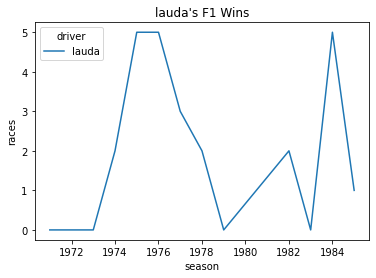

In [77]:
plot_data_wins.plot(title=f"{driver}'s F1 Wins", ylabel="races")

<AxesSubplot:title={'center':"lauda's F1 Race Starts"}, xlabel='season', ylabel='races'>

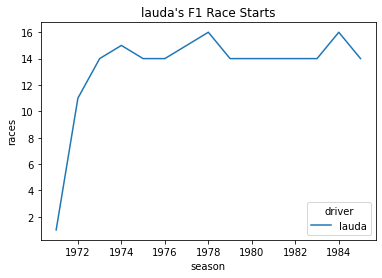

In [78]:
plot_data_start.plot(title=f"{driver}'s F1 Race Starts", ylabel="races")

### Combine the plots by merging the dataframes (join)

In [79]:
from functools import reduce
plot_data = reduce(lambda  left,right: pd.merge(left,right,on=["season"], how='inner'), [plot_data_start, plot_data_wins])
plot_data.rename(
    columns={
        f"{driver}_x": "starts",
        f"{driver}_y": "wins"
    }, inplace=True)
plot_data.head()

driver,starts,wins
season,,
1971,1,0
1972,11,0
1973,14,0
1974,15,2
1975,14,5


<AxesSubplot:title={'center':"lauda's F1 Career"}, xlabel='season', ylabel='races'>

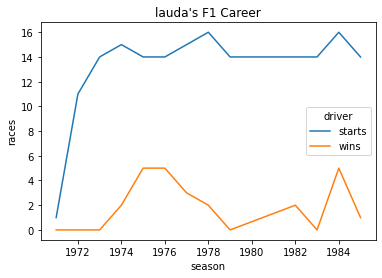

In [80]:
plot_data.plot(title=f"{driver}'s F1 Career", ylabel="races")

In [81]:
# explore more possibilities to store the results, e.g. to_sql()
f1_career.to_csv(f"../../results/f1_career_{driver}.csv", index=False)

### Combine the plots by concatenating two dataframes

In [82]:
# concat 2 dataframes
df_1 = f1_results[['driver', 'nationality']]
df_2 = f1_results[['constructor', 'season']]

# axis = 0 concatenates vertically (the small df's must have the same columns). Rows will be added
# axis = 1 concatenates horizontally (a big df will be build from the 2 smaller df's). Columns will be added.
big_df = pd.concat([df_1, df_2], axis=1)
print(big_df)

                driver nationality constructor  season
0               farina     Italian        alfa    1950
1              fagioli     Italian        alfa    1950
2          reg_parnell     British        alfa    1950
3            cabantous      French        lago    1950
4               rosier      French        lago    1950
...                ...         ...         ...     ...
25202  kevin_magnussen      Danish        haas    2022
25203            albon        Thai    williams    2022
25204           latifi    Canadian    williams    2022
25205          tsunoda    Japanese  alphatauri    2022
25206           bottas     Finnish        alfa    2022

[25207 rows x 4 columns]


In [83]:
# recreate plot_data using concat
del plot_data

plot_data = pd.concat([plot_data_start, plot_data_wins], axis=1)
plot_data.head()

driver,lauda,lauda
season,,
1971,1,0
1972,11,0
1973,14,0
1974,15,2
1975,14,5


<AxesSubplot:title={'center':"lauda's F1 Career"}, xlabel='season', ylabel='races'>

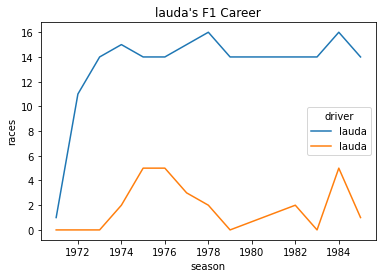

In [84]:
plot_data.plot(title=f"{driver}'s F1 Career", ylabel="races")